# Homework Assignment 3: Exploratory Data Analysis
## Fahad Ahmed
### fs05847@st.habib.edu.pk 

In [585]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline  

In [586]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/dataSci/hw3/loan_small.csv")

## Part 1
### point 1

In [587]:
df["term"] = df["term"].str.strip(" months")

## point 2:

In [588]:
df["emp_length"] = df["emp_length"].str.strip("<")
df["emp_length"] = df["emp_length"].str.strip("year")
df["emp_length"] = df["emp_length"].str.strip("years")
df["emp_length"] = df["emp_length"].str.replace('+',"")

In [589]:
df.shape

(999, 47)

In [590]:
# df = df.dropna()    # Dropping the missing values.
# df.shape

##### Not dropping missing rows because it loses too much data

In [591]:
percent_missing = df["mths_since_last_delinq"].isnull().sum() * 100 / len(df)
percent_missing1 = df["mths_since_last_record"].isnull().sum() * 100 / len(df)

# percent_missing
# percent_missing1

In [592]:
df["emp_length"] = df["emp_length"].astype(float)

## changed it to float because it has missing values so can't change it to integar.
### cannot do drop rows because some columes have missing value % over 90 so dropping rows making data loss and cannot drop those columns because the question ask us to Imputation on those columns in next part.

## point 3

In [593]:
df["loan_status"] = df["loan_status"].replace({"Fully Paid":"good","Current":"good","Charged Off":"bad","Late (31-120 days)":"bad","Default":'bad'})

good    820
bad     179
Name: loan_status, dtype: int64

#### loan_status is now binary attribute with good/bad. fully paid = good, charged off = bad, current is sort of medium but ill make to good because thats also fine

## point 4: Impute or replace missing values

In [594]:
df["mths_since_last_delinq"].fillna(df["mths_since_last_delinq"].median(), inplace = True)

In [595]:
df["mths_since_last_record"].fillna(df["mths_since_last_record"].median(), inplace = True)

# Explanation: fill both columns with median because there was rapid change in the values.
### missing value % was very high for both columns so should have drop the them because question asked to do Imputation

#### part 1 done

In [596]:
df1 = df

## Part 2 - Exploratory Data Analysis
#### new dataframe = df1

## dropping these columns because there is no use of them in this part and they doesn't make any sense to me so to make dataframe look better I dropped them.

In [597]:
df1 = df1.drop(columns=['emp_title',"mths_since_last_delinq","mths_since_last_record","application_type","initial_list_status","verification_status"])

In [598]:
df1["purpose"].describe()

count                    999
unique                    13
top       debt_consolidation
freq                     527
Name: purpose, dtype: object

### there 13 different reasons for people to get the loan and most common(Mode) purpose for loan is debt_consolidation with frequency of 527 out of 999.

In [599]:
df1["installment"].describe()

count     999.000000
mean      366.992743
std       200.510423
min        33.940000
25%       223.440000
50%       337.750000
75%       469.235000
max      1243.850000
Name: installment, dtype: float64

### the mean Installment is 366.7 almost 367 and the maximum install by an employee is 1234 and the minimum Installment is 33.9
### standard variation is 200

In [600]:
df1["loan_amnt"].describe()

count      999.000000
mean     12704.354354
std       7463.253235
min       1000.000000
25%       7050.000000
50%      11500.000000
75%      16050.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [601]:
df1["loan_amnt"].mean()-df1["loan_amnt"].median()

1204.3543543543547

### the maximum loan amount taken is 35000 and the minimum is 1000
### the mean for the loan amount taken by an employee is 12704. the median and mean have only difference of 1200.

## univariate

<AxesSubplot:>

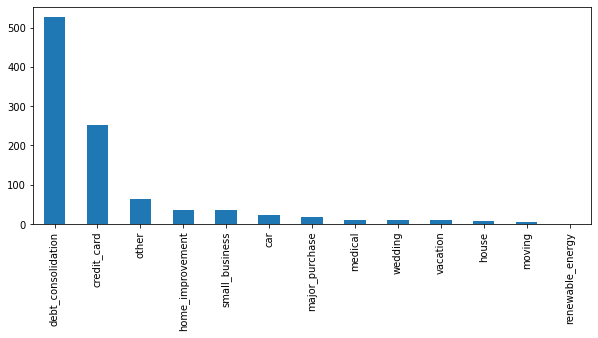

In [602]:
a = df1['purpose'].value_counts()
df1['purpose'].value_counts().plot(kind='bar', figsize=(10,4))

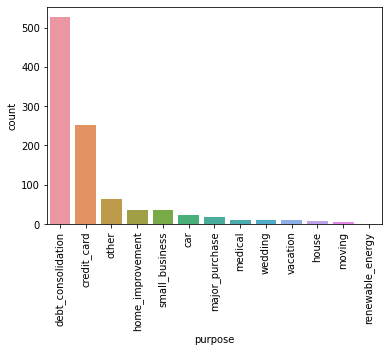

In [603]:
sns.countplot(x ='purpose', data = df1, order=df1['purpose'].value_counts()[:13].index).tick_params(axis='x', rotation=90)

### on x-axis we have "purpose" and on y-axis is count.
#### as we can in see both bar graphs that biigest purpose of loan is "debt_consolidation" as it has highest bar (above 500) and second highest is "credit_card" which means it is the second most common reason for loan. the rest of the purposes are below 100.

<AxesSubplot:>

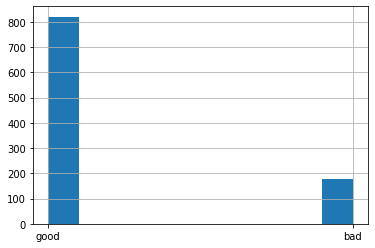

In [604]:
df1['loan_status'].hist()

## as we can see in the histogram that their above 800 people for good status for loan and very less people, below 200, have bad status for loan.
## it majority of people fully paid the loan and some people has not paid the loan. 

## bivariate

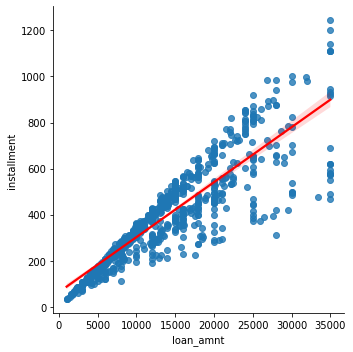

In [605]:
sns.lmplot(data=df1,x="loan_amnt", y="installment",line_kws={'color': 'red'},scatter=True)

## x-axis = loan_amnt, y-axis = installment
## as we can see in the graph the we linear relation between loan_amnt and installment. it means that as the loan_amnt increases installment also increase with constant(positve) rate.

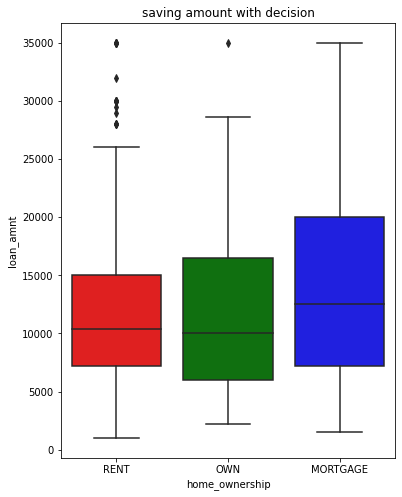

In [606]:
plt.figure(figsize=(6,8))
colors = ['red', 'green','blue']
sns.boxplot(data =df1, y='loan_amnt', x='home_ownership',palette=colors)
plt.title('saving amount with decision')
plt.show()

### from boxplot we can see that the people who has rent-home has range of loan_amount from around 7000 to 15000 and the median is slightly above 1000.
### for people who own the whom, their loan_amount ranges from roughly 6000 to around 16000 and the median is very close to 1000.
### the people who live in mortage their loan_amount starts around 8000 and goes till around 2000. and their median loan_amount is 12500.

In [607]:
df1 = df1.drop(columns=["grade","inq_last_6mths",'zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line','open_acc','out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','id','member_id','term',"emp_length",'issue_d','pub_rec','revol_bal','revol_util','funded_amnt_inv','total_rec_prncp','total_rec_int'])	

#### dropped some columns because there is no use of them and doesn't make any sense.

<AxesSubplot:>

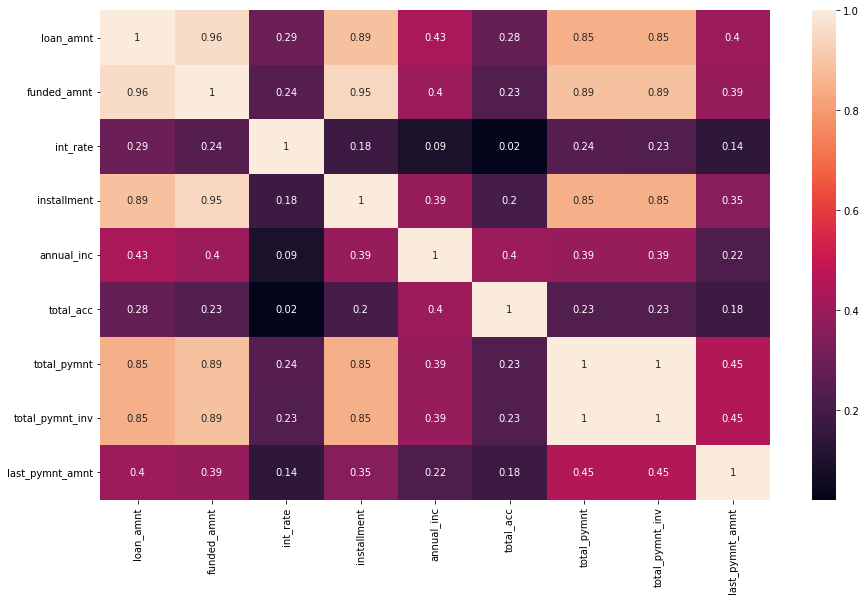

In [608]:
plt.figure(figsize = (15,9))
sns.heatmap(round(df1.corr(),2),annot=True)

## as we can see in the heatmap that loan_amnt has strong correlation with funded_amnt which means that almost linear relationship with high gradient as their correlation 0.96, closer to 1, so if loan_amnt increases then funded_amnt will also increases with a postive rate.
## loan_amnt has weak correlation with int_rate so it means that their linear relationship but with low gradient so thier correlation is 0.29 so it is postive then as int_rate increases, loan_amnt will also increase but very low rate.